# Overview

This notebook is to obtain posts in [r/streetphotography](https://old.reddit.com/r/streetphotography/) using PRAW python API from reddit 

## Goal

- Initialize PRAW object
- Obtain posts on r/streetphotography
- Create functions to eaily obtain posts for future notebook

### Import Libraries

In [1]:
import os
from urllib.request import urlopen
import io
import numpy as np
from colorthief import ColorThief

from src.photo_tools import reddit_tools
from src.photo_tools import palette_tools

import webcolors
import matplotlib.pyplot as plt
%matplotlib inline

### Initializing imports

In [2]:
agent_name = "photo_color_analyzer"
reddit = reddit_tools(agent_name)
pl = palette_tools()

In [3]:
df = reddit.get_top_posts("streetphotography", time="month", limit=10)

#### Ensure URL contains image

Some urls may contain a reddit album which requires web scraping to pull values. In the interest of time, I will be only dealing with .jpg extensions

In [4]:
df["is_img"] = df.url.apply(lambda x: 1 if x[-3:] == "jpg" else np.nan)
df.dropna(inplace = True)

In [5]:
df

,title,url,is_img
0,Divorce.,https://i.redd.it/ov0vb8oeqfx51.jpg,1.0
1,"Lady and a tram - Helsinki, 2020.",https://i.redd.it/5am6hexj5wv51.jpg,1.0
2,Catching some sun,https://i.redd.it/4a6vng9c6dw51.jpg,1.0
3,After a Heavy Downpour in Singapore,https://i.redd.it/sly0nygfezw51.jpg,1.0
4,Untitled,https://i.redd.it/6hxw3hq6gkw51.jpg,1.0
5,Golden light,https://i.redd.it/je1k0wjhdgu51.jpg,1.0
7,"Charing Cross Road, London. (2020)",https://i.redd.it/j3t20ztndbv51.jpg,1.0
8,Bus journey home. London - October 2020,https://i.redd.it/8d6tezju43w51.jpg,1.0
9,2020 so far.,https://i.redd.it/1l83wkg6k9t51.jpg,1.0


In [6]:
df["rgb_palette"] = df.url.apply(pl.get_palette) #this process can be slow

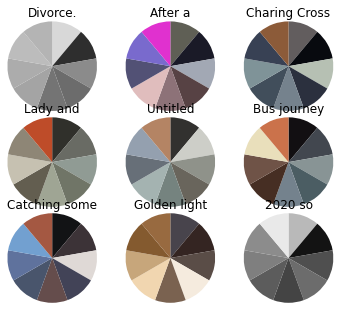

In [7]:
fig, ax = plt.subplots(3, 3, figsize=(6,5))

for i in range(0, df.shape[0]):

    col = i//3
    row = i%3
    plot_df = df.iloc[i,:]
    
    wedges = [1] * len(plot_df.rgb_palette)
    sorted_color = pl.palette_sort(plot_df.rgb_palette)
    color = pl.rgb_hex_list(sorted_color)
    
    ax[row, col].pie(wedges, colors=color, startangle=90, counterclock=False, radius=1.4);
    ax[row, col].set_title(" ".join(plot_df.title.split()[:2]), pad=10)


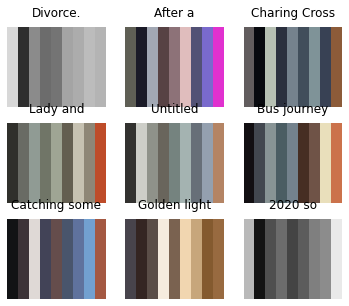

In [8]:
fig, ax = plt.subplots(3, 3, figsize=(6,5))

for i in range(0, df.shape[0]):
    col = i//3
    row = i%3
    plot_df = df.iloc[i,:]
    width = 1
    
    x = range(len(plot_df.rgb_palette))
    y = [width] * len(plot_df.rgb_palette)
    color = pl.rgb_hex_list(plot_df.rgb_palette)
    
    axe = ax[row, col]
    
    axe.bar(x,y, color=color, width=width);
    axe.set_title(" ".join(plot_df.title.split()[:2]), pad=10)
    axe.xaxis.set_visible(False)
    axe.yaxis.set_visible(False)
    axe.set_xlim(-(width/2), (len(x)-(width/2)))
    axe.set_ylim(0,1)
    axe.axis("off")